### Script to check if IS correlates with
1. jaccard similaiies between mutation profiles of CLs
2. mean #mutations across ccle andg gdsc common concordant (found by thresholding jaccard)cell lines

In [78]:
__author__ = 'Aanchal'

In [31]:
import pandas as pd
import FUNCTIONS as f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
source='CELL' #'CMP' #'COSMIC' #'CMP' #CELL #COSMIC

In [3]:
plotting_df=pd.read_csv('../data_processed/InconsistencyFactorAnalysis/mutation_anaysis_withCDgenes_'+source+'.csv')

In [5]:
plotting_df.rename(columns={'Unnamed: 0': 'Standard cell line name'}, inplace=True)

plotting_df_cl=plotting_df.groupby('Standard cell line name')['mean IS','mean mae_fitness','hamming','jaccard','kappa','#muts ccle','#muts gdsc'].mean()
#plotting_df_cl=plotting_df.groupby('Standard cell line name')['ccle_category','gdsc_category'].sum()

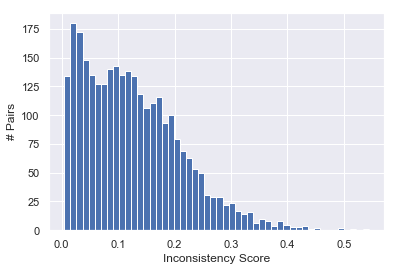

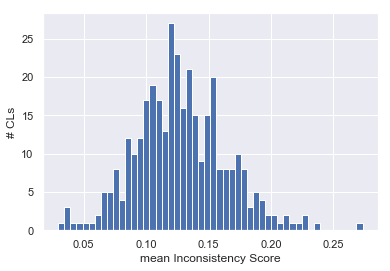

Standard drug name
Crizotinib      0.100253
Erlotinib       0.090542
Lapatinib       0.094880
NVP-TAE684      0.164585
Nilotinib       0.090684
Nutlin-3a       0.069149
PD0325901       0.174709
PHA-665752      0.082658
PLX-4720        0.065536
Paclitaxel      0.216361
Palbociclib     0.147930
Saracatinib     0.099701
Selumetinib     0.136361
Sorafenib       0.093281
Tanespimycin    0.217229
Name: mean IS per drug, dtype: float64


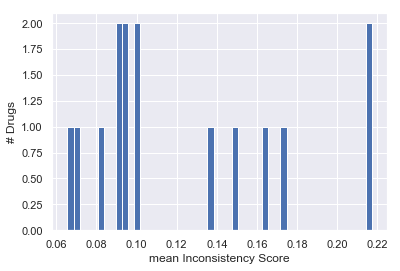

In [6]:
plotting_df_dr=plotting_df.groupby('Standard drug name')['IS','mae_fitness'].mean()
plotting_df_dr.rename(columns={'IS': 'mean IS per drug','mae_fitness': 'mean mae_fitness per drug'}, inplace=True)  

from pylab import hist
hist(plotting_df['IS'],50,label='All pairs')
plt.xlabel('Inconsistency Score')
plt.ylabel('# Pairs')
plt.show()
hist(plotting_df_cl['mean IS'],50,label='CLs')
plt.xlabel('mean Inconsistency Score')
plt.ylabel('# CLs')
plt.show()
hist(plotting_df_dr['mean IS per drug'],50,label='Drugs')
plt.xlabel('mean Inconsistency Score')
plt.ylabel('# Drugs')
print(plotting_df_dr['mean IS per drug'])

In [7]:
plotting_df['Metrics to measure similarity between mutation profiles']=0*len(plotting_df)
plotting_df_cl['Metrics to measure similarity between mutation profiles']=0*len(plotting_df)

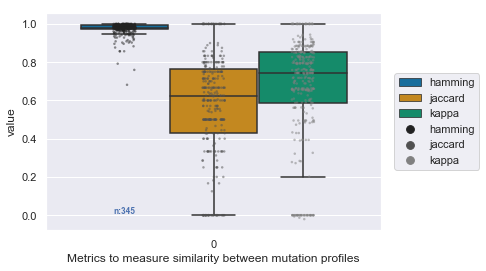

In [9]:
f.clusteringBoxplot(plotting_df_cl, 'Metrics to measure similarity between mutation profiles', ['hamming','jaccard','kappa'],'',0,0)

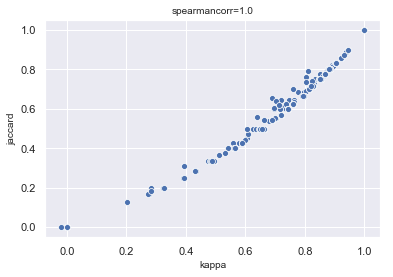

In [10]:
corr=f.plotVectorsGetCorr_seaborn('kappa','jaccard',plotting_df_cl,'spearman' )

0.6

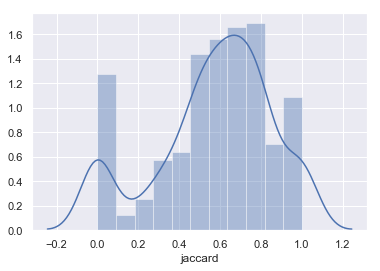

In [11]:
#f.clusteringBoxplot(plotting_df, 'Metrics to measure similarity between mutation profiles', 'IS','',-0.25,1)

sns.distplot(plotting_df_cl['jaccard'])
#f.clusteringBoxplot(plotting_df_cl, 'Metrics to measure similarity between mutation profiles', 'jaccard','',-0.25,1)
np.median(plotting_df['jaccard'])

In [13]:
#CLS which have very less similarity
len(plotting_df[plotting_df['jaccard']<=0.1]['Standard cell line name'].unique())
#len(plotting_df['Standard cell line name'].unique())
#40/345

40

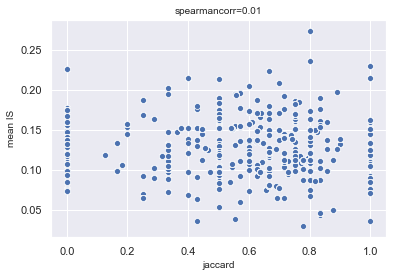

In [16]:
corr=f.plotVectorsGetCorr_seaborn('jaccard','mean IS',plotting_df,'spearman' )
#corr=f.plotVectorsGetCorr_seaborn('jaccard','IS',plotting_df_cl,'spearman' )

#outlier CLs with low kappa: not needed as the trend can be seen otherwise also
#temp=plotting_df[plotting_df['jaccard']<=0.1]
#( temp['Standard cell line name'].unique() )
#34/345=9.8% Cls have diff mut profiles

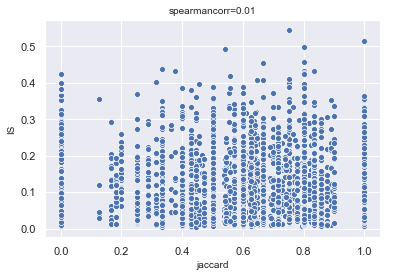

In [17]:
corr=f.plotVectorsGetCorr_seaborn('jaccard','IS',plotting_df,'spearman' )

Paclitaxel : -0.1
Tanespimycin : 0.03
PD0325901 : 0.02
NVP-TAE684 : -0.0
Palbociclib : 0.04
Crizotinib : -0.03
Erlotinib : 0.09
Lapatinib : 0.09
Nilotinib : -0.0
PHA-665752 : 0.02
Saracatinib : -0.11
Sorafenib : 0.01
Selumetinib : 0.04
Nutlin-3a : -0.01
PLX-4720 : -0.02


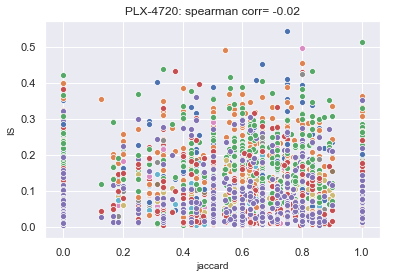

In [18]:
dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
#dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901']
temp=plotting_df[plotting_df['jaccard']<0.1]
for i in range(len(dname_list)):
    
    dname=dname_list[i]
    temp=plotting_df[plotting_df['Standard drug name']==dname]

    corr=f.plotVectorsGetCorr_seaborn('jaccard','IS',temp,'spearman' )
    plt.title(dname+": spearman corr= "+str(corr))
    print(dname+" : "+str(corr))
    #plt.show()


#### Checking if high no of mutations is causing inconsistency

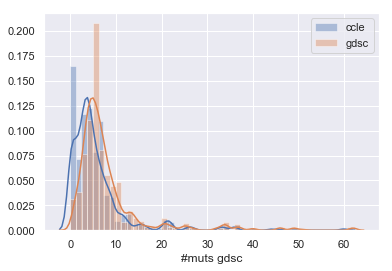

In [27]:
#Distribution of no of mutations in CCLE
sns.distplot(plotting_df['#muts ccle'], label='ccle')

#Distribution of no of mutations in GDSC
sns.distplot(plotting_df['#muts gdsc'], label='gdsc')

plt.legend()

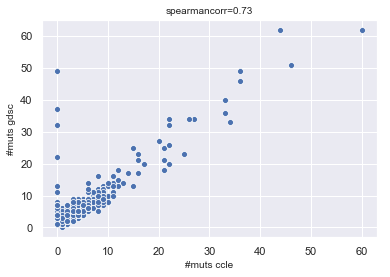

In [28]:
#Corr between no of mutatuions in CCLE and GDSC
corr=f.plotVectorsGetCorr_seaborn('#muts ccle','#muts gdsc',plotting_df_cl,'spearman' )

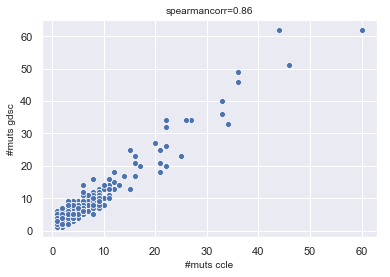

In [30]:
plotting_df_cl_conc=plotting_df_cl[plotting_df_cl['jaccard']>0.1]
plotting_df_cl_dis=plotting_df_cl[plotting_df_cl['jaccard']<0.1]
corr=f.plotVectorsGetCorr_seaborn('#muts ccle','#muts gdsc',plotting_df_cl_conc,'spearman' )

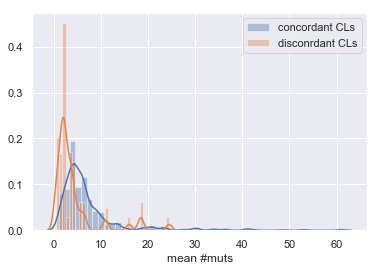

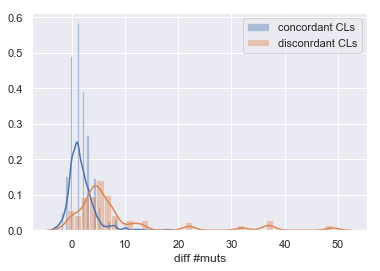

In [36]:
#plotting_df_activedr=plotting_df.loc[(plotting_df['ccle_category']==2.0) & (plotting_df['gdse_category']==2.0)]

plotting_df_activedr=plotting_df
plotting_df_conc=plotting_df_activedr[plotting_df_activedr['jaccard']>0.1]
plotting_df_dis=plotting_df_activedr[plotting_df_activedr['jaccard']<0.1]

plotting_df_cl_conc['mean #muts']=(plotting_df_cl_conc['#muts gdsc']+plotting_df_cl_conc['#muts ccle'])/2
plotting_df_cl_dis['mean #muts']=(plotting_df_cl_dis['#muts gdsc']+plotting_df_cl_dis['#muts ccle'])/2
plotting_df_conc['mean #muts']=(plotting_df_conc['#muts gdsc']+plotting_df_conc['#muts ccle'])/2
plotting_df_dis['mean #muts']=(plotting_df_dis['#muts gdsc']+plotting_df_dis['#muts ccle'])/2

plotting_df_cl['diff #muts']=(plotting_df_cl['#muts gdsc']-plotting_df_cl['#muts ccle'])
plotting_df_cl_conc['diff #muts']=(plotting_df_cl_conc['#muts gdsc']-plotting_df_cl_conc['#muts ccle'])
plotting_df_cl_dis['diff #muts']=(plotting_df_cl_dis['#muts gdsc']-plotting_df_cl_dis['#muts ccle'])
plotting_df_conc['diff #muts']=(plotting_df_conc['#muts gdsc']-plotting_df_conc['#muts ccle'])
plotting_df_dis['diff #muts']=(plotting_df_dis['#muts gdsc']-plotting_df_dis['#muts ccle'])


sns.distplot(plotting_df_conc['mean #muts'], label='concordant CLs')
sns.distplot(plotting_df_dis['mean #muts'], label='disconrdant CLs')
plt.legend()

plt.show()
sns.distplot(plotting_df_conc['diff #muts'], label='concordant CLs')
sns.distplot(plotting_df_dis['diff #muts'], label='disconrdant CLs')
plt.legend()


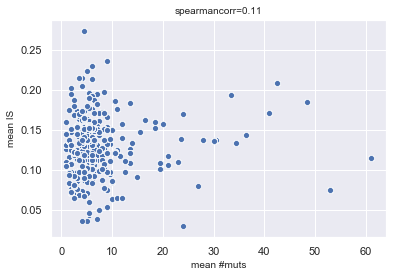

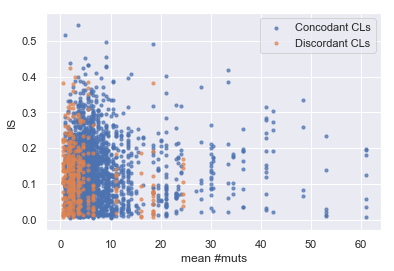

In [45]:
corr=f.plotVectorsGetCorr_seaborn('mean #muts','mean IS',plotting_df_conc,'spearman' )
plt.show()

#corr=f.plotVectorsGetCorr_seaborn('mean #muts','IS',plotting_df_conc,'spearman' )
plt.scatter(plotting_df_conc['mean #muts'] , plotting_df_conc['IS'],label='Concodant CLs',s=10, alpha=0.7)

#plt.show()
#orr=f.plotVectorsGetCorr_seaborn('mean #muts','IS',plotting_df_dis,'spearman' )
plt.scatter(plotting_df_dis['mean #muts'] , plotting_df_dis['IS'],label='Discordant CLs',s=10, alpha=0.7)
plt.legend()

plt.xlabel('mean #muts')
plt.ylabel('IS')

plt.show()



Paclitaxel : 0.19
Tanespimycin : 0.06
PD0325901 : 0.11
NVP-TAE684 : -0.0
Palbociclib : 0.05
Crizotinib : -0.02
Erlotinib : 0.05
Lapatinib : 0.23
Nilotinib : -0.03
PHA-665752 : 0.11
Saracatinib : 0.0
Sorafenib : -0.11
Selumetinib : -0.03
Nutlin-3a : -0.01
PLX-4720 : 0.09


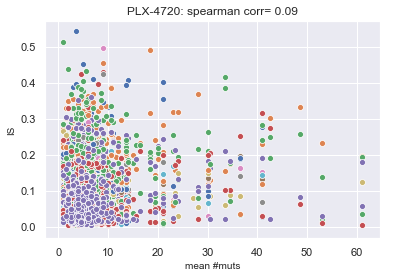

In [43]:
dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
#dname_list=['Paclitaxel', 'Lapatinib']
for i in range(len(dname_list)):
    
    dname=dname_list[i]#'Paclitaxel'
    
    temp=plotting_df_conc[plotting_df_conc['Standard drug name']==dname]
    corr=f.plotVectorsGetCorr_seaborn('mean #muts','IS',temp,'spearman' )
    
    
    
    plt.title(dname+": spearman corr= "+str(corr))
    #plt.show()
    print(dname+" : "+str(corr)) #outlier include, gdsc muts, actlitaxel corr incsed to 0.23